In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np

In [137]:
#load data
summary = datasets.load_iris()
x_train = summary.data
y_train = summary.target
df = summary.data
df = pd.DataFrame(df)
df.columns = summary.feature_names
y_train = pd.DataFrame(y_train)
y_train.columns = ['Species']
joined = pd.concat([df,y_train],axis = 1)



In [3]:
keys=pd.value_counts(joined.Species).index.values
values = summary.target_names
dictionary = dict(zip(keys, values))

In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
#observe missing values
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()
if missing_data.size> 0:
    f, ax = plt.subplots(figsize=(15, 12))
    plt.xticks(rotation='90')
    sns.barplot(x=all_data_na.index, y=all_data_na)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    plt.show()

Skewness: -0.104997
Kurtosis: -1.339754


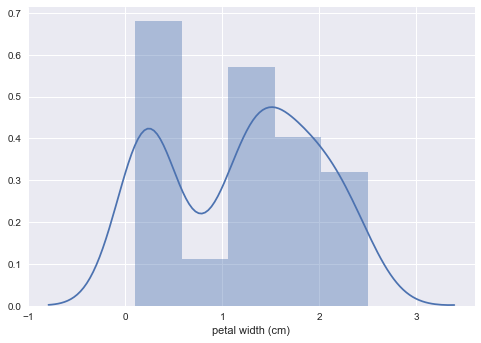

In [6]:
#continous:distirbution
sns.distplot(df['petal width (cm)'])
print("Skewness: %f" % df['petal width (cm)'].skew())
print("Kurtosis: %f" % df['petal width (cm)'].kurt())
plt.show()

In [7]:
#continous:skewness




Skew in numerical features: 



,Skew
sepal width (cm),0.334053
sepal length (cm),0.314911
petal width (cm),-0.104997
petal length (cm),-0.274464


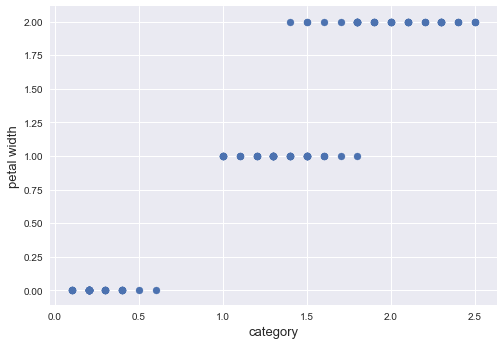

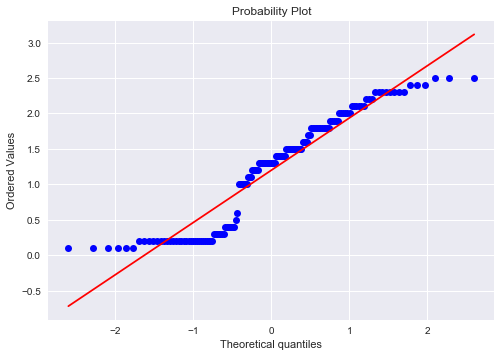

In [8]:
#continous:probability quantile
from scipy import stats
fig, ax = plt.subplots()
ax.scatter(x = df['petal width (cm)'], y =y_train)
plt.ylabel('petal width', fontsize=13)
plt.xlabel('category', fontsize=13)
plt.show()
fig = plt.figure()
res = stats.probplot(df['petal width (cm)'], plot=plt)
plt.show()

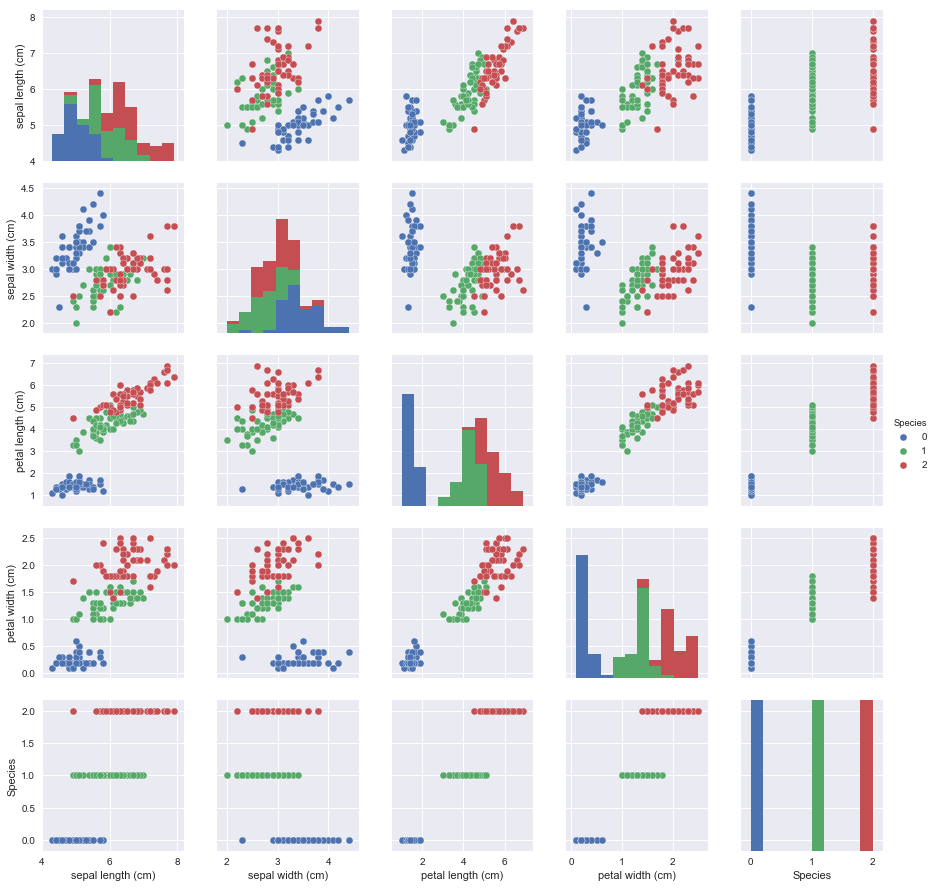

In [9]:
#continous:pairwise correlation

sns.pairplot(joined,hue='Species',kind='scatter')
plt.show()

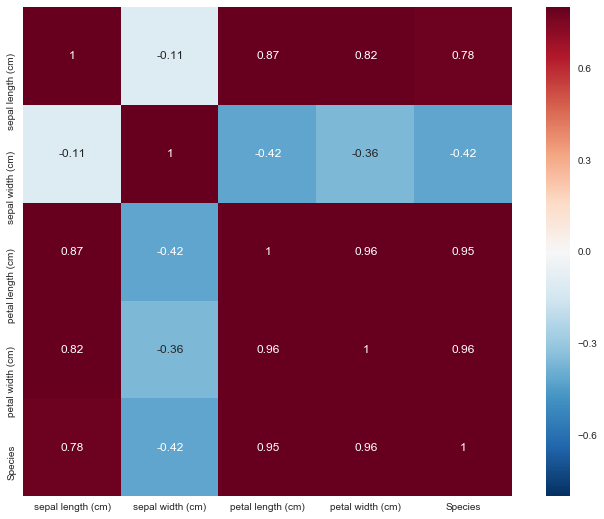

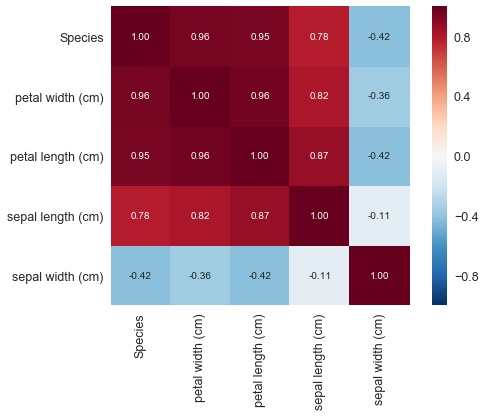

In [10]:
#continous:bivariate - target:continous,feature:continous
corrmat = joined.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);
plt.show()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Species')['Species'].index
cm = np.corrcoef(joined[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

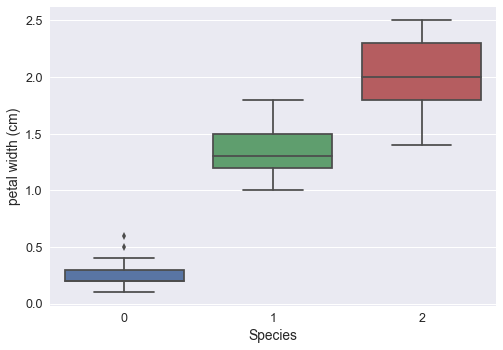

In [11]:
#continous:bivariate - target:categorical, feature:continous
sns.boxplot(x='Species',y=joined["petal width (cm)"],data=joined)
#sns.barplot(x=joined['petal width (cm)'],y='Species',data=joined)
plt.show()

In [12]:
def bivariate(df,target):
    target_type = df[target].dtype
    for col in df.columns:
        if col != target:
            col_type = df[col].dtype
            print (target,col)
            if col_type == 'object' and target_type == 'object':
                sns.countplot(y=target,hue=col,data=df)
                print "D_D"
            elif col_type != 'object' and target_type == 'object':
                sns.barplot(y=col,x=target,data=df)
                plt.show()
                sns.boxplot(y=col,x=target,data=df)
                print "C_D"
            elif col_type == 'object' and target_type != 'object':
                sns.barplot(y=target,x=col,data=df)
                plt.show()
                sns.boxplot(y=target,x=col,data=df)
                print "D_C"
            else:
                sns.jointplot(y=target,x=col,data=df)
                print "C_C"
            plt.show()
        

In [13]:
joined.Species = joined.Species.map(dictionary)

In [14]:
#bivariate(joined,'Species')

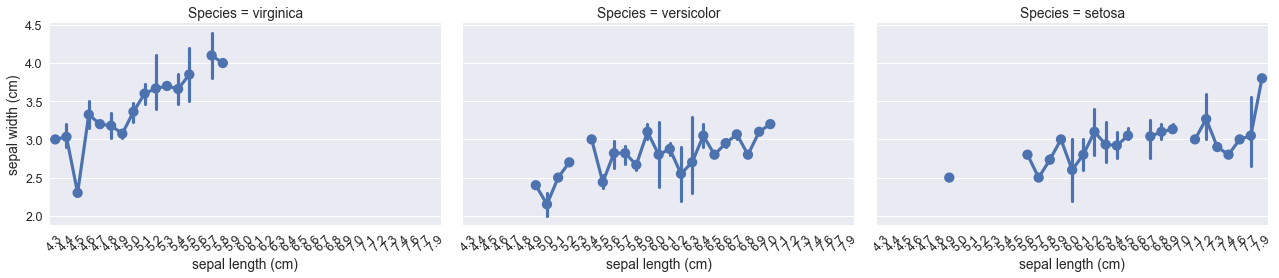

In [15]:
#multivaraite:factor plot
g = sns.factorplot(x='sepal length (cm)',y='sepal width (cm)',col='Species',data=joined,kind='point',aspect=1.5)
g.set_xticklabels(rotation=45)
plt.show()

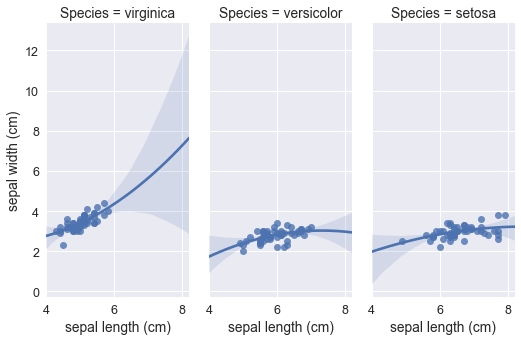

In [16]:
#bivaraite:regression
sns.lmplot(x='sepal length (cm)',y='sepal width (cm)',col='Species', data=joined,
           aspect=.5,order=2);
plt.show()

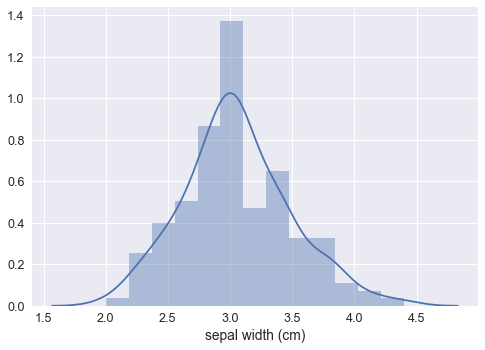

In [74]:
##convert continous variable into bins
sns.distplot(joined.iloc[:,1])
plt.show()
a,b = pd.qcut(joined["sepal length (cm)"],5,labels =['1','2','3','4','5'],retbins=True)
a = np.array(a)

In [114]:
#time conversion

#from string to time
from datetime import datetime
stamp = datetime(2009,1,1)
value = '2009-01-31'
converted = datetime.strptime(value,'%Y-%m-%d')

#from time to string
datetime.strftime(converted,'%Y-%m-%d')

#lazy parsing
from dateutil.parser import parse
today = parse("march 01, 2017 10:00pm")

#get info
#day of month
today.day

#day of week
s

#month
today.month

#year
today.year





datetime.date(2017, 3, 1)

In [188]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold']) 

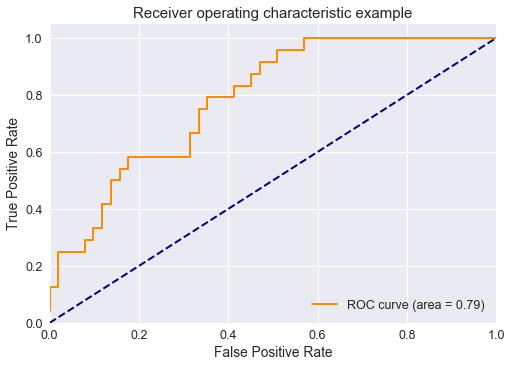

In [189]:
#ROC curve 
#Macro-average method can be used when you want to know how the system performs overall across the sets of data. You should not come up with any specific decision with this average. 
#On the other hand, micro-average can be a useful measure when your dataset varies in size.

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Binarize the output
y = label_binarize(y_train.values, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = x_train.shape
X = np.c_[x_train, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, Y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], threshold[i]= roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    Y_pred =classifier.predict(X_test)[:,i]
    Find_Optimal_Cutoff(Y_test[:,i],Y_pred)



# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()




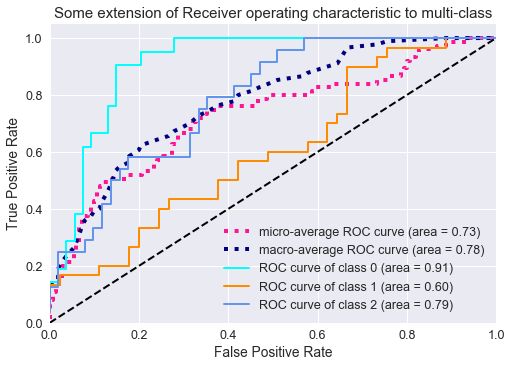

In [190]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [191]:
#cross validation

In [213]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier,x_train, y = y_train['Species'], scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

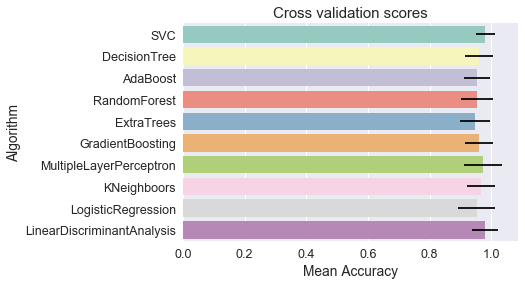

In [214]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

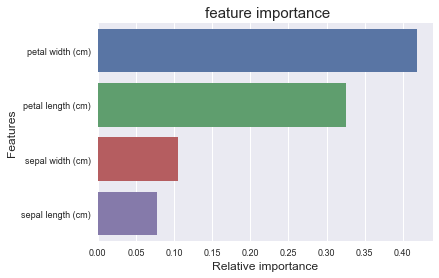

In [337]:
######feature importance
model = classifiers[5]
model.fit(x_train,y_train)
indices = np.argsort(randomforest.feature_importances_)[::-1][:40]
g = sns.barplot(y=df.columns[indices][:40],x = randomforest.feature_importances_[indices][:40] ,orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title(" feature importance")
y_pred = model.predict(x_train)

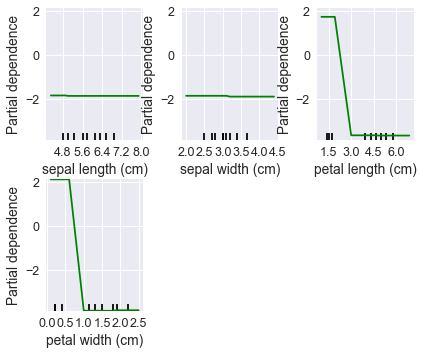

In [320]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
plot_partial_dependence(model, X=x_train,features=[0,1,2,3],feature_names=df.columns,label=0,grid_resolution=50)
plt.subplots_adjust(top=1.2,left=0.1)
plt.show()

In [336]:
##########plot decision tree
rf = classifiers[3]
tree = rf.estimators_[0]
from sklearn.tree import export_graphviz

export_graphviz(tree,
                feature_names=df.columns,
                filled=True,
                rounded=True,
                out_file='tree.dot')

In [338]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150



In [339]:
print metrics.confusion_matrix(y_pred,y_train)

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
